In [57]:
# import numpy as np

# tasks = np.random.randint(low=1, high=6, size=3)
# tasks

array([2, 1, 1])

# Решаемые задачи 
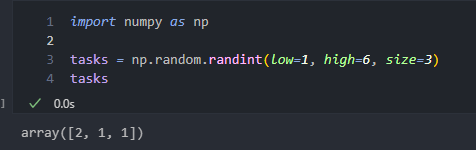

## Уровень 1 
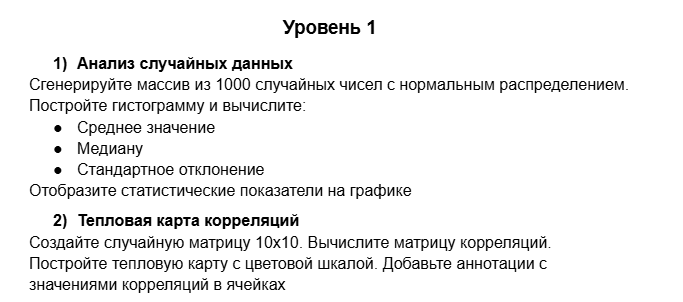

(10, 10)


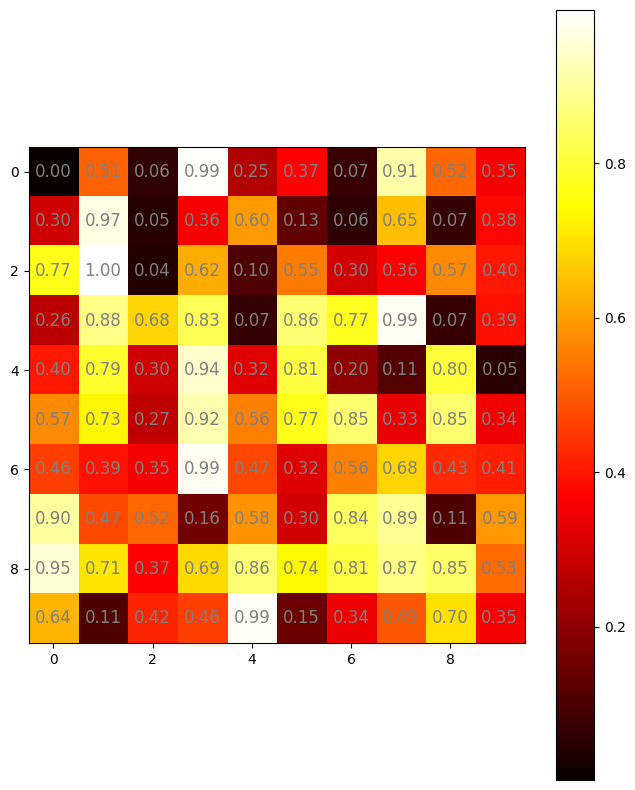

In [83]:
import numpy as np
import matplotlib.pyplot as plt

matrix = np.random.rand(10, 10)
print(matrix.shape)

fig, ax = plt.subplots(figsize=(8, 10))
im = ax.imshow(matrix, cmap='hot', origin="upper", interpolation="nearest")
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        text = ax.text(j, i, f"{matrix[i, j]:.2f}",
                       ha="center", va="center", color="grey", fontsize=12)

plt.colorbar(im)
plt.show()

## Уровень 2 
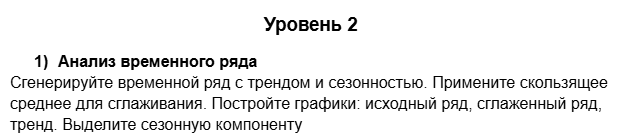

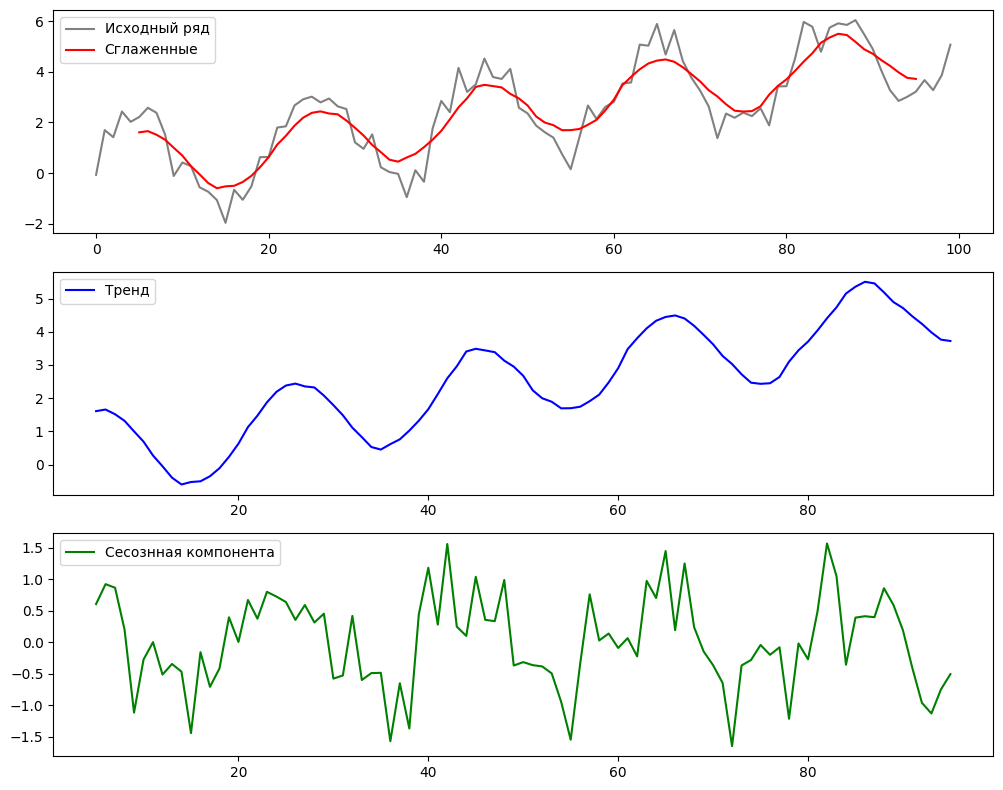

In [99]:
import pandas as pd
np.random.seed(99)
n = 100
t = np.arange(n)

trend = 0.05 * t

season =  2 * np.sin(2 * np.pi * t / 20)

noise = np.random.normal(0, 0.5, n)

y = trend + season + noise

data = pd.DataFrame({"Дни": t, "Значения": y})

window = 10
data['Сглаженные'] = data['Значения'].rolling(window=window, center=True).mean()
data['Тренд'] = data['Сглаженные']
data['Сесознная_компонента'] = data['Значения'] - data['Тренд']

fig, ax = plt.subplots(3, figsize=(10, 8))
ax[0].plot(data['Дни'], data['Значения'], label='Исходный ряд', color='grey')
ax[0].plot(data['Дни'], data['Сглаженные'], label='Сглаженные', color='red')
ax[0].legend()

ax[1].plot(data['Дни'], data['Тренд'], label='Тренд', color='blue')
ax[1].legend()

ax[2].plot(data['Дни'], data['Сесознная_компонента'], label='Сесознная компонента', color='green')
ax[2].legend()

plt.tight_layout()
plt.show()


## Уровень 3
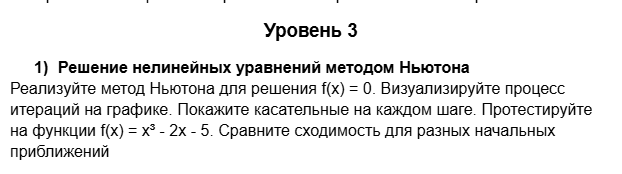

x0 = -3.0 | итераций = 10 | x* = -0.709192459425 | f(x*) = 3.33e-16


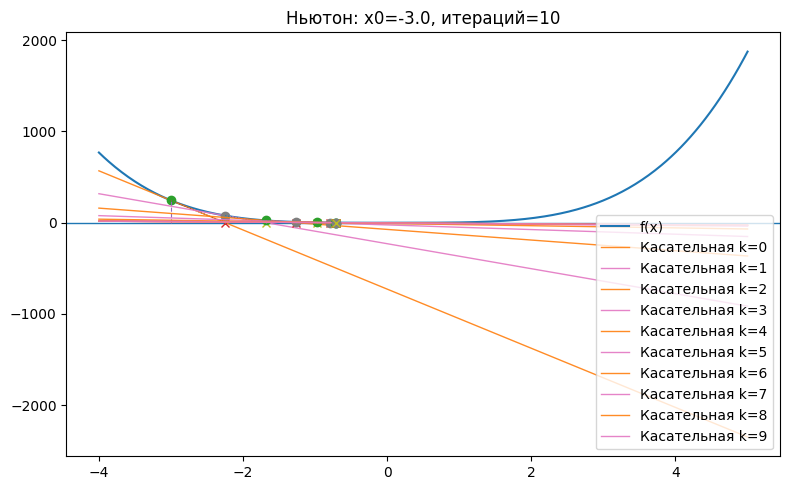

x0 = 0.1 | итераций = 15 | x* = 0.709192459425 | f(x*) = 3.33e-16


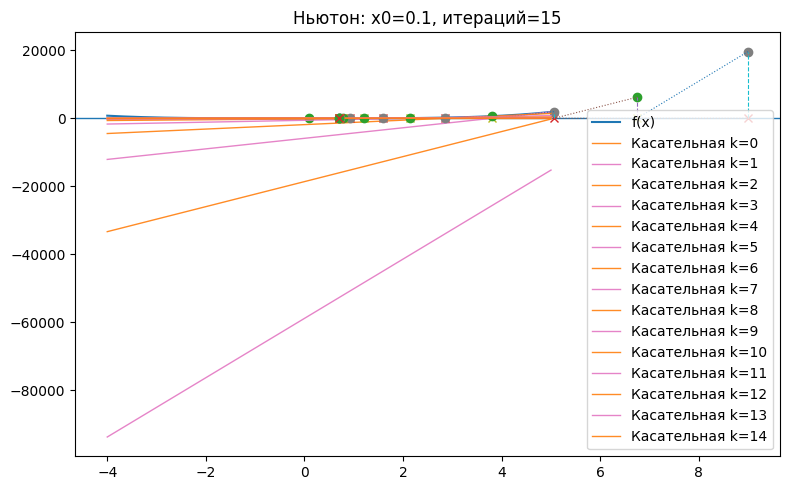

x0 = 2.0 | итераций = 9 | x* = 0.709192459425 | f(x*) = -2.22e-16


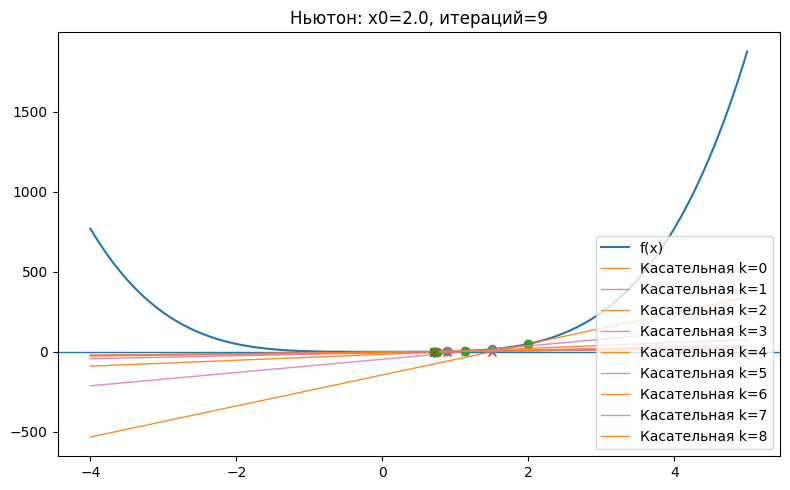

x0 = 5.0 | итераций = 12 | x* = 0.709192459425 | f(x*) = 3.33e-16


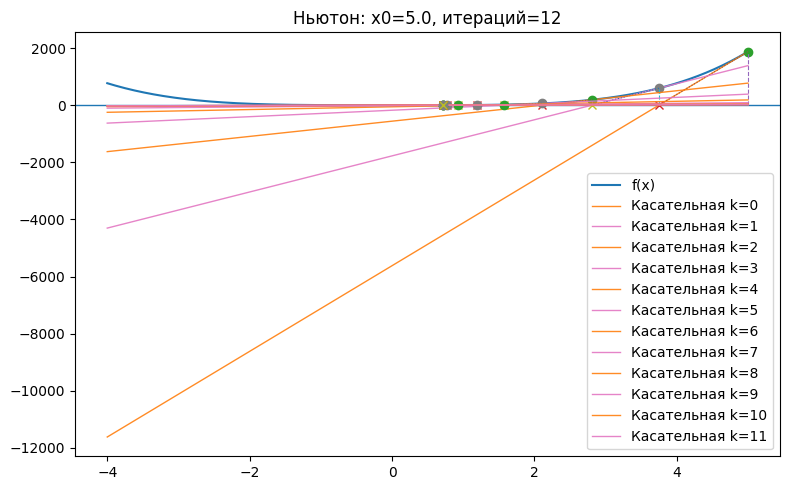

In [114]:
# Рандомная функция

def f(x):
    return 3 * x**4 - np.cos(x)

def df(x):
    return 12 * x**3 + np.sin(x)

def newton(f, df, x0, tol=1e-10, max_iter=20):
    x = float(x0)
    xs = [x]

    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        
        if dfx == 0:                    
            raise ZeroDivisionError("f'(x)=0")
        
        x_next = x - fx / dfx
        xs.append(x_next)

        if abs(x_next - x) < tol:
            x = x_next  # критерий остановки
            break
        x = x_next
    return xs

def plot_newton(f, df, xs, xlim=(-4, 5)):
    x = np.linspace(*xlim, 400)
    y = f(x)

    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(x, y, label="f(x)")
    ax.axhline(0, linewidth=1)

    xline = np.linspace(*xlim, 200)
    for k in range(len(xs)-1):
        xk = xs[k]
        fxk = f(xk)
        dfxk = df(xk)
        # y = kx + b
        # В нашем случае y = f'(xk)*(x - xk) + f(xk)
        ytan = fxk + dfxk*(xline - xk)
        ax.plot(xline, ytan, linewidth=1, alpha=0.9, label=f"Касательная k={k}")
        ax.plot([xk], [fxk], 'o')       # точка на кривой
        ax.plot([xs[k+1]], [0], 'x')    # проекция на ось x
        ax.plot([xk, xk], [0, fxk], '--', linewidth=0.8)      # вертикаль
        ax.plot([xk, xs[k+1]], [fxk, 0], ':', linewidth=0.8)  # шаг к x_{k+1}

    ax.set_title(f"Ньютон: x0={xs[0]}, итераций={len(xs)-1}")
    ax.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

# --- Запуск: попробуй x0=2.0 (хорошо сходится к ≈2.094551...)
for x0 in [-3.0, 0.1, 2.0, 5.0]:
    xs = newton(f, df, x0)
    x_star = xs[-1]
    print(f"x0 = {x0} | итераций = {len(xs)-1} | x* = {x_star:.12f} | f(x*) = {f(x_star):.2e}")
    plot_newton(f, df, xs)